In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wine_data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
df = pd.read_csv(wine_data)

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.shape

(6497, 13)

In [7]:
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5215,red,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
466,white,7.0,0.14,0.32,9.0,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
5573,red,9.3,0.41,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.2,5
641,white,6.1,0.28,0.25,12.9,0.054,34.0,189.0,0.99790,3.25,0.43,9.0,4
2410,white,7.0,0.16,0.26,7.3,0.047,30.0,220.0,0.99622,3.38,0.58,10.1,6
2166,white,7.0,0.35,0.31,1.8,0.069,15.0,162.0,0.99440,3.18,0.47,9.4,5
922,white,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6
3757,white,6.5,0.26,0.34,1.4,0.040,25.0,184.0,0.99216,3.29,0.46,10.7,5
430,white,6.8,0.29,0.50,13.3,0.053,48.0,194.0,0.99740,3.09,0.45,9.4,5
3708,white,7.7,0.35,0.46,11.8,0.088,61.0,183.0,0.99786,2.86,0.47,9.0,5


In [8]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [9]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df.isnull().mean()*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

/tmp/ipykernel_489/1506967435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

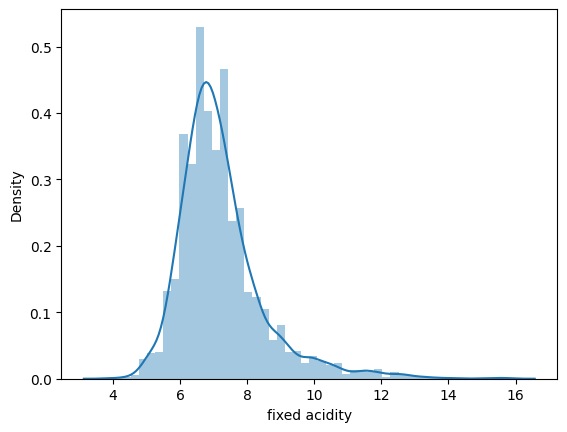

In [11]:
sns.distplot(df['fixed acidity'])

In [12]:
df['fixed acidity'].skew()

np.float64(1.7228045308969795)

/tmp/ipykernel_489/1170114340.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['volatile acidity'])


<Axes: xlabel='volatile acidity', ylabel='Density'>

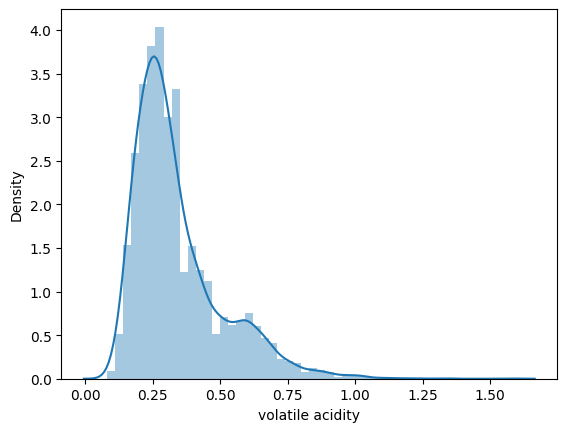

In [13]:
sns.distplot(df['volatile acidity'])

/tmp/ipykernel_489/2338668416.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['citric acid'])


<Axes: xlabel='citric acid', ylabel='Density'>

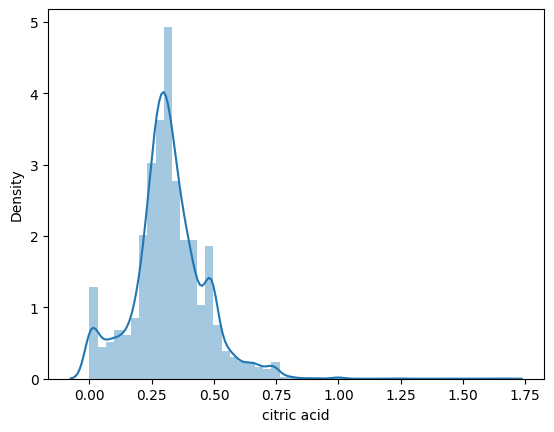

In [14]:
sns.distplot(df['citric acid'])

/tmp/ipykernel_489/107078400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

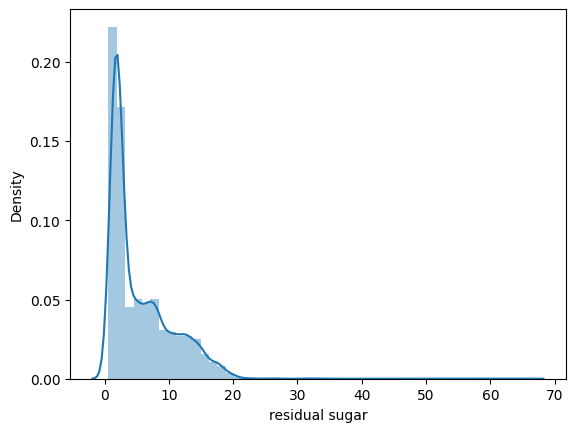

In [15]:
sns.distplot(df['residual sugar'])

In [16]:
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# trf1 = ColumnTransformer([
#     ('transformed_cols',SimpleImputer(strategy = 'median'),[1,2,3,4,5,9,10])
# ],remainder = "passthrough")

In [17]:
new_df = df.copy()

In [18]:
new_df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
new_df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
new_df['citric acid'] = df['citric acid'].fillna(df['citric acid'].median())
new_df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].median())
new_df['chlorides'] = df['chlorides'].fillna(df['chlorides'].median())
new_df['pH'] = df['pH'].fillna(df['pH'].mean())
new_df['sulphates'] = df['sulphates'].fillna(df['sulphates'].median())

In [19]:
new_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/tmp/ipykernel_489/1614621123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pH'])


<Axes: xlabel='pH', ylabel='Density'>

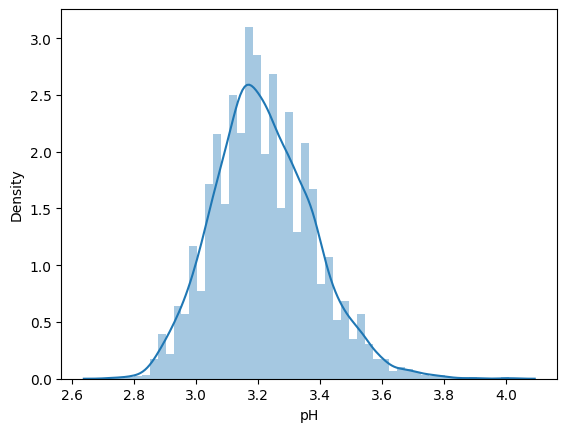

In [20]:
sns.distplot(df['pH'])

/tmp/ipykernel_489/1195402505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sulphates'])


<Axes: xlabel='sulphates', ylabel='Density'>

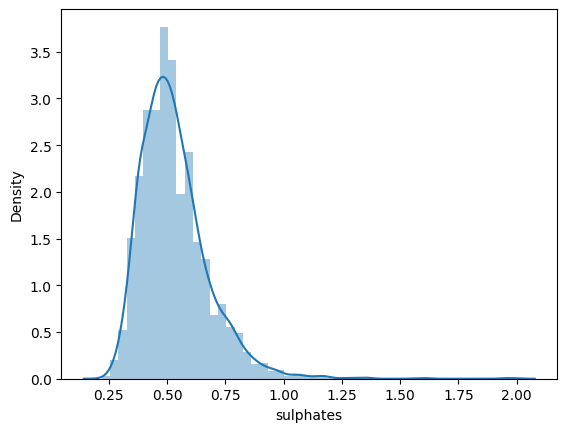

In [21]:
sns.distplot(df['sulphates'])

In [22]:
new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [24]:
new_df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [25]:
#using the One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
ohe.fit_transform(new_df[['type']])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [26]:
new_df = pd.get_dummies(new_df,columns = ['type'],drop_first = True)

In [27]:
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True


In [28]:
new_df['type_white'] = new_df['type_white'].astype(int)

In [29]:
new_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
167,6.7,0.46,0.18,2.4,0.034,25.0,98.0,0.98960,3.08,0.44,12.600000,7,1
2313,6.8,0.32,0.30,3.3,0.029,15.0,80.0,0.99061,3.33,0.63,12.600000,7,1
240,7.3,0.32,0.23,13.7,0.050,49.0,197.0,0.99850,3.20,0.46,8.700000,5,1
1467,7.1,0.25,0.49,3.0,0.030,30.0,96.0,0.99030,3.13,0.39,12.300000,7,1
5027,6.1,0.38,0.15,1.8,0.072,6.0,19.0,0.99550,3.42,0.57,9.400000,5,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,1
1103,7.9,0.29,0.39,6.7,0.036,6.0,117.0,0.99380,3.12,0.42,10.700000,5,1
671,6.6,0.28,0.36,1.7,0.038,22.0,101.0,0.99120,3.29,0.57,11.600000,6,1
6387,6.2,0.57,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.800000,6,0
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,1


In [30]:
new_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

In [31]:
X = new_df.drop(columns = ['quality'])
y = df['quality']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [33]:
X_train.shape

(5197, 12)

In [34]:
y_train

1916    5
947     5
877     6
2927    7
6063    5
       ..
3772    6
5191    6
5226    6
5390    7
860     8
Name: quality, Length: 5197, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.47923076923076924

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [41]:
X_train_scaled

array([[-0.47888897, -0.54322164,  0.27961632, ..., -0.75102378,
        -1.08506915,  0.57312868],
       [ 0.97495289, -1.08668148,  0.21067728, ..., -1.14835027,
        -0.41405807,  0.57312868],
       [-0.93799692, -0.36206836,  0.14173824, ..., -1.0159081 ,
        -0.24630531,  0.57312868],
       ...,
       [ 4.72433453, -0.42245279,  2.07203138, ...,  0.90450327,
        -0.66568723, -1.74480887],
       [ 1.28102486,  0.36254475,  1.31370194, ...,  2.42758815,
         2.43773898, -1.74480887],
       [ 0.66888092, -0.42245279,  0.21067728, ...,  0.63961894,
        -0.07855254,  0.57312868]])

In [42]:
X_test_scaled

array([[-0.172817  , -0.54322164,  0.90006769, ..., -0.35369728,
         1.17959322,  0.57312868],
       [ 0.28629096, -1.20745033,  2.89929987, ..., -0.88346594,
         0.256953  ,  0.57312868],
       [-0.78496094, -1.1470659 , -0.34083504, ..., -1.0159081 ,
        -1.16894553,  0.57312868],
       ...,
       [ 0.51584494, -0.12053066,  1.31370194, ...,  3.61956762,
        -1.08506915, -1.74480887],
       [ 0.20977297,  1.14754228, -1.7885549 , ...,  0.37473461,
         0.17307661, -1.74480887],
       [ 0.05673698,  1.02677343, -0.96128641, ...,  1.30182976,
        -0.83343999, -1.74480887]])

In [43]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [44]:
y_pred_new = knn.predict(X_test_scaled)

In [45]:
y_pred_new

array([7, 6, 6, ..., 5, 6, 6])

In [46]:
accuracy_score(y_pred_new,y_test)

0.556923076923077

In [47]:
#now will do the PCA stuffs here

In [48]:
X_train_scaled

array([[-0.47888897, -0.54322164,  0.27961632, ..., -0.75102378,
        -1.08506915,  0.57312868],
       [ 0.97495289, -1.08668148,  0.21067728, ..., -1.14835027,
        -0.41405807,  0.57312868],
       [-0.93799692, -0.36206836,  0.14173824, ..., -1.0159081 ,
        -0.24630531,  0.57312868],
       ...,
       [ 4.72433453, -0.42245279,  2.07203138, ...,  0.90450327,
        -0.66568723, -1.74480887],
       [ 1.28102486,  0.36254475,  1.31370194, ...,  2.42758815,
         2.43773898, -1.74480887],
       [ 0.66888092, -0.42245279,  0.21067728, ...,  0.63961894,
        -0.07855254,  0.57312868]])

In [49]:
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)

In [50]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.478889,-0.543222,0.279616,0.559383,-0.320881,1.318389,1.136624,0.366609,-0.860252,-0.751024,-1.085069,0.573129
1,0.974953,-1.086681,0.210677,-0.799687,-0.497178,-0.365454,0.553731,-0.398540,-1.606372,-1.148350,-0.414058,0.573129
2,-0.937997,-0.362068,0.141738,-0.799687,1.853444,0.139699,-0.205796,-0.864283,-0.176308,-1.015908,-0.246305,0.573129
3,-0.172817,-0.180915,-0.065079,0.768471,-0.585326,0.813236,0.430087,-0.844323,-1.482019,-1.479456,1.263470,0.573129
4,0.974953,0.604082,1.244763,-0.736961,9.199137,-0.870606,-1.371581,0.546253,-1.295489,3.752010,-0.917316,-1.744809
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.708443,-0.603606,-0.202957,1.730274,-0.614709,1.262261,0.324107,0.323362,-0.300661,-1.015908,0.089200,0.573129
5193,-0.249335,0.121007,-0.478713,-0.632417,1.236406,-1.431887,-1.760176,0.566214,1.191580,0.440956,-0.330182,-1.744809
5194,4.724335,-0.422453,2.072031,-0.590599,0.766281,-1.375759,-1.671859,1.830374,-0.362838,0.904503,-0.665687,-1.744809
5195,1.281025,0.362545,1.313702,-0.590599,-0.115202,-0.982862,-1.565879,0.100470,0.631990,2.427588,2.437739,-1.744809


In [51]:
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [52]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.172817,-0.543222,0.900068,-0.653326,-0.320881,0.532596,0.041492,-1.349987,-0.362838,-0.353697,1.179593,0.573129
1,0.286291,-1.207450,2.899300,-0.799687,-0.467795,-0.197069,-0.223459,-1.030620,-0.922428,-0.883466,0.256953,0.573129
2,-0.784961,-1.147066,-0.340835,1.165737,-0.614709,0.869364,0.006165,0.439798,-0.611545,-1.015908,-1.168946,0.573129
3,-0.402371,-1.086681,0.003860,1.479369,-0.614709,-0.702222,0.712702,0.652709,-2.103786,-1.148350,-1.252822,0.573129
4,-0.325853,-0.422453,-0.685530,2.587533,-0.644092,-0.814478,0.006165,1.397898,-0.922428,-0.022592,-1.085069,0.573129
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,-0.555407,-0.241300,0.003860,-0.716052,-0.350264,0.195827,-0.453083,-0.947452,0.942873,0.970724,0.424706,0.573129
1296,-0.402371,-0.603606,-0.202957,1.981179,-0.085819,1.374517,0.359434,1.228234,-1.171135,-0.088813,-1.252822,0.573129
1297,0.515845,-0.120531,1.313702,-0.757869,8.376420,-0.758350,-1.053640,0.732551,-1.108958,3.619568,-1.085069,-1.744809
1298,0.209773,1.147542,-1.788555,-0.590599,0.883813,-0.589966,-1.265601,0.599481,1.005050,0.374735,0.173077,-1.744809


In [53]:
X_train.isnull().sum()
X_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type_white              0
dtype: int64

In [54]:
L = []
new_L = []
for i in X_train:
    L.append(i)
    new_L.append(X_train[i].var())
d = dict(zip(L,new_L)) 
print(d)

{'fixed acidity': 1.0001924557351713, 'volatile acidity': 1.0001924557351705, 'citric acid': 1.0001924557351778, 'residual sugar': 1.0001924557351716, 'chlorides': 1.000192455735178, 'free sulfur dioxide': 1.000192455735177, 'total sulfur dioxide': 1.000192455735185, 'density': 1.000192455735179, 'pH': 1.00019245573518, 'sulphates': 1.0001924557351871, 'alcohol': 1.0001924557351771, 'type_white': 1.0001924557351736}


In [57]:
L = []
new_L = []
for i in new_df:
    L.append(i)
    new_L.append(new_df[i].var())
d = dict(zip(L,new_L)) 
new_d = dict(sorted(d.items(),key = lambda x:x[1]))
print(new_d)

{'density': 8.992039783233351e-06, 'chlorides': 0.0012271702933563124, 'citric acid': 0.021092152071323433, 'sulphates': 0.022132283197587668, 'pH': 0.025804217541345695, 'volatile acidity': 0.027078953931513286, 'type_white': 0.18557025372074415, 'quality': 0.7625747692568792, 'alcohol': 1.4225613158900883, 'fixed acidity': 1.6790436790265173, 'residual sugar': 22.63461964481531, 'free sulfur dioxide': 315.04119226636476, 'total sulfur dioxide': 3194.7200386773857}


In [58]:
low_var_cols = ['density','chlorides']

In [60]:
X_train = X_train.drop(columns = low_var_cols)

In [61]:
X_test = X_test.drop(columns = low_var_cols)

In [62]:
X_train.shape

(5197, 10)

In [63]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,type_white
0,-0.478889,-0.543222,0.279616,0.559383,1.318389,1.136624,-0.860252,-0.751024,-1.085069,0.573129
1,0.974953,-1.086681,0.210677,-0.799687,-0.365454,0.553731,-1.606372,-1.148350,-0.414058,0.573129
2,-0.937997,-0.362068,0.141738,-0.799687,0.139699,-0.205796,-0.176308,-1.015908,-0.246305,0.573129
3,-0.172817,-0.180915,-0.065079,0.768471,0.813236,0.430087,-1.482019,-1.479456,1.263470,0.573129
4,0.974953,0.604082,1.244763,-0.736961,-0.870606,-1.371581,-1.295489,3.752010,-0.917316,-1.744809


In [70]:
cov_x_train = np.cov(X_train,rowvar = False)

In [71]:
cov_x_test = np.cov(X_test,rowvar = False)

In [72]:
eigvals,eigvectors = np.linalg.eigh(cov_x_train)

In [73]:
eigvals

array([0.11595716, 0.27925339, 0.36895351, 0.53606986, 0.5504172 ,
       0.60909973, 0.944688  , 1.34408175, 1.70542662, 3.54797733])

In [74]:
eigvectors

array([[ 0.1822928 ,  0.52724441,  0.41571407,  0.21374681,  0.1722379 ,
         0.14133748,  0.08900928,  0.00474537,  0.60290949, -0.22178726],
       [ 0.24692659,  0.02791137, -0.57215172,  0.28838409,  0.02896425,
         0.44252127,  0.20583393, -0.39603891, -0.07664823, -0.35492515],
       [ 0.01351666, -0.26197916, -0.42092848,  0.46400595, -0.12258287,
        -0.19971966, -0.28527998,  0.31927743,  0.52728712,  0.14977633],
       [ 0.0126021 , -0.01543738,  0.19915068,  0.07845259, -0.80318198,
         0.12827245,  0.09634148, -0.40113916,  0.14909142,  0.31592626],
       [ 0.2508246 , -0.39318871,  0.3214355 ,  0.19585343,  0.38306418,
         0.43022242, -0.34319533, -0.20128398, -0.03902818,  0.38621152],
       [-0.55449973,  0.52223623, -0.27497746,  0.05748475,  0.18936352,
         0.16359068, -0.18924434, -0.17946762, -0.01432534,  0.45829527],
       [ 0.13297677,  0.27744927,  0.15616815,  0.49023338, -0.12889298,
        -0.34903944, -0.48335872, -0.13842051

In [76]:
# by sklean
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [77]:
pca.fit_transform(X_train)

array([[ 2.31775685,  0.31973839, -0.74159151, ...,  0.03070649,
        -0.45497343, -0.1763913 ],
       [ 1.02048101,  1.16085619,  1.03690999, ..., -0.26098031,
         0.52621669, -0.38952543],
       [ 0.6654916 , -0.7495169 ,  0.64631509, ...,  0.33019931,
        -0.61801779,  0.17233778],
       ...,
       [-2.9688215 ,  4.71960989,  0.76248746, ..., -1.38192173,
         0.8643125 ,  0.27539232],
       [-3.361267  ,  1.31658635,  1.76013516, ..., -0.11711627,
        -0.15722846, -0.20310049],
       [-0.05061976,  0.49849415,  0.50066652, ..., -0.24465914,
         0.26143735,  0.72488474]])

In [78]:
pca.components_

array([[-0.22178726, -0.35492515,  0.14977633,  0.31592626,  0.38621152,
         0.45829527, -0.2131246 , -0.2656792 , -0.11199554,  0.46352106],
       [ 0.60290949, -0.07664823,  0.52728712,  0.14909142, -0.03902818,
        -0.01432534, -0.45162143,  0.22357105, -0.2388887 , -0.13275196],
       [ 0.00474537, -0.39603891,  0.31927743, -0.40113916, -0.20128398,
        -0.17946762, -0.13842051, -0.13292829,  0.64614521,  0.23069959],
       [-0.08900928, -0.20583393,  0.28527998, -0.09634148,  0.34319533,
         0.18924434,  0.48335872,  0.67646446,  0.09939342, -0.06578803],
       [ 0.14133748,  0.44252127, -0.19971966,  0.12827245,  0.43022242,
         0.16359068, -0.34903944,  0.14538658,  0.60707036, -0.06710762],
       [-0.1722379 , -0.02896425,  0.12258287,  0.80318198, -0.38306418,
        -0.18936352,  0.12889298,  0.14567198,  0.29678613,  0.02923838],
       [-0.21374681, -0.28838409, -0.46400595, -0.07845259, -0.19585343,
        -0.05748475, -0.49023338,  0.56883919

In [85]:
explained_per_var = (pca.explained_variance_/pca.explained_variance_.sum())*100

In [87]:
a = np.cumsum(explained_per_var)

In [89]:
len(a[a<=90])

6

In [90]:
pca_modified = PCA(n_components = 7)

In [94]:
X_mod_train = pca_modified.fit_transform(X_train)

In [95]:
X_mod_train

array([[ 2.31775685,  0.31973839, -0.74159151, ..., -0.04512368,
        -0.664043  , -0.01400992],
       [ 1.02048101,  1.16085619,  1.03690999, ..., -0.45046864,
        -1.19824387,  0.39248982],
       [ 0.6654916 , -0.7495169 ,  0.64631509, ..., -0.67139436,
        -0.69447415, -0.07688735],
       ...,
       [-2.9688215 ,  4.71960989,  0.76248746, ..., -0.90306644,
        -0.34183198, -0.96433185],
       [-3.361267  ,  1.31658635,  1.76013516, ...,  1.05366671,
         1.23611887, -0.18244207],
       [-0.05061976,  0.49849415,  0.50066652, ..., -0.08681916,
        -0.73341159,  0.33948589]])

In [96]:
X_mod_test = pca_modified.fit_transform(X_test)

In [97]:
X_mod_test

array([[ 0.67079125, -0.0173933 ,  1.63755629, ...,  0.42432184,
        -0.05585502, -0.45315765],
       [ 1.08863491,  1.68016212,  2.32921025, ..., -1.01572405,
         0.02541224, -1.15781518],
       [ 1.93974421, -0.24333956, -0.75703541, ..., -0.80620338,
         0.00593946,  0.26730907],
       ...,
       [-2.05176347,  2.84910758, -0.21925392, ..., -0.62470922,
        -1.52361226,  1.74102625],
       [-2.9780522 , -0.8827906 , -0.92547578, ...,  0.35004716,
        -0.0324302 ,  0.15587886],
       [-3.37970471, -0.4532771 , -1.39194617, ..., -0.88217644,
        -0.02381196,  0.21268968]])

In [99]:
knn_mod = KNeighborsClassifier()
knn_mod.fit(X_mod_train,y_train)

KNeighborsClassifier()

In [100]:
y_pred = knn_mod.predict(X_mod_test)

In [101]:
accuracy_score(y_pred,y_test)

0.5607692307692308

In [106]:
pca_new = PCA(n_components = 3)
X_train_pca = pca_new.fit_transform(X_train)

In [109]:
import plotly.express as px
import pandas as pd

pca_df = pd.DataFrame(
    X_train_pca,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df['quality'] = y_train.values.astype(str)  # make categorical

fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='quality',                 # categorical coloring
    opacity=0.75
)

fig.update_layout(
    title="3D PCA colored by Quality (categorical)",
    legend_title_text="Quality"
)

fig.show()
